<a href="https://colab.research.google.com/github/ltbatista/machine-learning/blob/master/KNN_DiagnosticBreastCancerWiscounsinDataset_ML_Michigan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Este projeto é o trabalho de entrega da primeira semana do curso Applied Machine Learning with Python da Universidade de Michigan oferecido através da plataforma Coursera, abaixo você pode conferir a análise de um conjunto de dados de diagnóstico de Câncer de Mama de Wiscousin, disponível na biblioteca sklearn. 

# Assignment 1 - Introduction to Machine Learning


For this assignment, you will be using the Breast Cancer Wisconsin (Diagnostic) Database to create a classifier that can help diagnose patients. First, read through the description of the dataset (below).

In [0]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

#print(cancer.DESCR) # Print the data set description

In [40]:
print(cancer.DESCR) # Print the data set description

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

The object returned by `load_breast_cancer()` is a scikit-learn Bunch object, which is similar to a dictionary.

In [41]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

### Question 0 (Example)

How many features does the breast cancer dataset have?

*This function should return an integer.*

In [42]:
# You should write your whole answer within the function provided. The autograder will call
# this function and compare the return value against the correct solution value
def answer_zero():
    # This function returns the number of features of the breast cancer dataset, which is an integer. 
    # The assignment question description will tell you the general format the autograder is expecting
    return len(cancer['feature_names'])

# You can examine what your function returns by calling it in the cell. If you have questions
# about the assignment formats, check out the discussion forums for any FAQs
answer_zero() 

30

### Question 1

Scikit-learn works with lists, numpy arrays, scipy-sparse matrices, and pandas DataFrames, so converting the dataset to a DataFrame is not necessary for training this model. Using a DataFrame does however help make many things easier such as munging data, so let's practice creating a classifier with a pandas DataFrame. 



Convert the sklearn.dataset `cancer` to a DataFrame. 

*This function should return a `(569, 31)` DataFrame with * 

*columns = *

    ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
    'mean smoothness', 'mean compactness', 'mean concavity',
    'mean concave points', 'mean symmetry', 'mean fractal dimension',
    'radius error', 'texture error', 'perimeter error', 'area error',
    'smoothness error', 'compactness error', 'concavity error',
    'concave points error', 'symmetry error', 'fractal dimension error',
    'worst radius', 'worst texture', 'worst perimeter', 'worst area',
    'worst smoothness', 'worst compactness', 'worst concavity',
    'worst concave points', 'worst symmetry', 'worst fractal dimension',
    'target']

*and index = *

    RangeIndex(start=0, stop=569, step=1)

In [43]:
def answer_one():
    # criando as colunas para o dataframe
    colunas = np.append(cancer.feature_names,['target'])
    # criando o indice para o dataframe
    index = pd.RangeIndex(start=0, stop=len(cancer.data), step=1)
    # criando o dataframe
    df = np.append(cancer.data, cancer.target[:,None], axis=1)
    df_cancer = pd.DataFrame(data=df, index=index, columns=colunas)
    
    return df_cancer


answer_one()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


### Question 2
What is the class distribution? (i.e. how many instances of `malignant` (encoded 0) and how many `benign` (encoded 1)?)

*This function should return a Series named `target` of length 2 with integer values and index =* `['malignant', 'benign']`

In [44]:
def answer_two():
    cancerdf = answer_one()    
    # Your code here
    #contando as instancias
    contador = cancerdf.get('target').value_counts().tolist()[::-1]
    resposta = pd.Series(data=contador, index=['malignant', 'benign'], name='target')
    
    return resposta


answer_two()

malignant    212
benign       357
Name: target, dtype: int64

### Question 3
Split the DataFrame into `X` (the data) and `y` (the labels).

*This function should return a tuple of length 2:* `(X, y)`*, where* 
* `X`*, a pandas DataFrame, has shape* `(569, 30)`
* `y`*, a pandas Series, has shape* `(569,)`.

In [45]:
def answer_three():
    cancerdf = answer_one()
    
    X = cancerdf[cancer['feature_names']]
    y = cancerdf['target']  
    
    return X, y

answer_three()

(     mean radius  mean texture  ...  worst symmetry  worst fractal dimension
 0          17.99         10.38  ...          0.4601                  0.11890
 1          20.57         17.77  ...          0.2750                  0.08902
 2          19.69         21.25  ...          0.3613                  0.08758
 3          11.42         20.38  ...          0.6638                  0.17300
 4          20.29         14.34  ...          0.2364                  0.07678
 ..           ...           ...  ...             ...                      ...
 564        21.56         22.39  ...          0.2060                  0.07115
 565        20.13         28.25  ...          0.2572                  0.06637
 566        16.60         28.08  ...          0.2218                  0.07820
 567        20.60         29.33  ...          0.4087                  0.12400
 568         7.76         24.54  ...          0.2871                  0.07039
 
 [569 rows x 30 columns], 0      0.0
 1      0.0
 2      0.0
 

### Question 4
Using `train_test_split`, split `X` and `y` into training and test sets `(X_train, X_test, y_train, and y_test)`.

**Set the random number generator state to 0 using `random_state=0` to make sure your results match the autograder!**

*This function should return a tuple of length 4:* `(X_train, X_test, y_train, y_test)`*, where* 
* `X_train` *has shape* `(426, 30)`
* `X_test` *has shape* `(143, 30)`
* `y_train` *has shape* `(426,)`
* `y_test` *has shape* `(143,)`

In [46]:
from sklearn.model_selection import train_test_split

def answer_four():
    X, y = answer_three()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    
    return X_train, X_test, y_train, y_test
answer_four()

(     mean radius  mean texture  ...  worst symmetry  worst fractal dimension
 293       11.850         17.46  ...          0.3101                  0.07007
 332       11.220         19.86  ...          0.3292                  0.06522
 565       20.130         28.25  ...          0.2572                  0.06637
 278       13.590         17.84  ...          0.2335                  0.06263
 489       16.690         20.20  ...          0.4677                  0.07623
 ..           ...           ...  ...             ...                      ...
 277       18.810         19.98  ...          0.2567                  0.05737
 9         12.460         24.04  ...          0.4366                  0.20750
 359        9.436         18.32  ...          0.2454                  0.08136
 192        9.720         18.22  ...          0.1909                  0.06559
 559       11.510         23.93  ...          0.2112                  0.08732
 
 [426 rows x 30 columns],
      mean radius  mean texture  ...

### Question 5
Using KNeighborsClassifier, fit a k-nearest neighbors (knn) classifier with `X_train`, `y_train` and using one nearest neighbor (`n_neighbors = 1`).

*This function should return a * `sklearn.neighbors.classification.KNeighborsClassifier`.

In [47]:
from sklearn.neighbors import KNeighborsClassifier

def answer_five():
    X_train, X_test, y_train, y_test = answer_four()
    
    knn = KNeighborsClassifier(n_neighbors = 1)
    knn.fit(X_train,y_train)
    
    return knn
answer_five()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

### Question 6
Using your knn classifier, predict the class label using the mean value for each feature.

Hint: You can use `cancerdf.mean()[:-1].values.reshape(1, -1)` which gets the mean value for each feature, ignores the target column, and reshapes the data from 1 dimension to 2 (necessary for the precict method of KNeighborsClassifier).

*This function should return a numpy array either `array([ 0.])` or `array([ 1.])`*

In [48]:
def answer_six():
    cancerdf = answer_one()
    means = cancerdf.mean()[:-1].values.reshape(1, -1)
    
    knn = answer_five()
    prediction =  knn.predict(means)
    
    return prediction

answer_six()

array([1.])

### Question 7
Using your knn classifier, predict the class labels for the test set `X_test`.

*This function should return a numpy array with shape `(143,)` and values either `0.0` or `1.0`.*

In [49]:
def answer_seven():
    X_train, X_test, y_train, y_test = answer_four()
    knn = answer_five()
    
    prediction = knn.predict(X_test)
    
    return prediction
answer_seven()

array([1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 0.])

### Question 8
Find the score (mean accuracy) of your knn classifier using `X_test` and `y_test`.

*This function should return a float between 0 and 1*

In [50]:
def answer_eight():
    X_train, X_test, y_train, y_test = answer_four()
    knn = answer_five()
    
    score = knn.score(X_test,y_test)
    
    return score

answer_eight()

0.916083916083916

### Optional plot

Try using the plotting function below to visualize the differet predicition scores between training and test sets, as well as malignant and benign cells.

In [0]:
def accuracy_plot():
    import matplotlib.pyplot as plt

    %matplotlib inline

    X_train, X_test, y_train, y_test = answer_four()

    # Find the training and testing accuracies by target value (i.e. malignant, benign)
    mal_train_X = X_train[y_train==0]
    mal_train_y = y_train[y_train==0]
    ben_train_X = X_train[y_train==1]
    ben_train_y = y_train[y_train==1]

    mal_test_X = X_test[y_test==0]
    mal_test_y = y_test[y_test==0]
    ben_test_X = X_test[y_test==1]
    ben_test_y = y_test[y_test==1]

    knn = answer_five()

    scores = [knn.score(mal_train_X, mal_train_y), knn.score(ben_train_X, ben_train_y), 
              knn.score(mal_test_X, mal_test_y), knn.score(ben_test_X, ben_test_y)]


    plt.figure()

    # Plot the scores as a bar chart
    bars = plt.bar(np.arange(4), scores, color=['#4c72b0','#4c72b0','#55a868','#55a868'])

    # directly label the score onto the bars
    for bar in bars:
        height = bar.get_height()
        plt.gca().text(bar.get_x() + bar.get_width()/2, height*.90, '{0:.{1}f}'.format(height, 2), 
                     ha='center', color='w', fontsize=11)

    # remove all the ticks (both axes), and tick labels on the Y axis
    plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

    # remove the frame of the chart
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    plt.xticks([0,1,2,3], ['Malignant\nTraining', 'Benign\nTraining', 'Malignant\nTest', 'Benign\nTest'], alpha=0.8);
    plt.title('Training and Test Accuracies for Malignant and Benign Cells', alpha=0.8)

Uncomment the plotting function to see the visualization.

**Comment out** the plotting function when submitting your notebook for grading. 

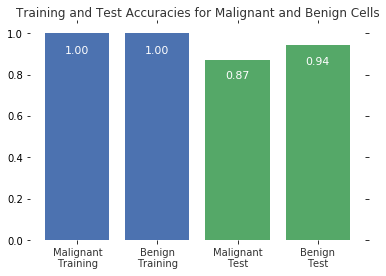

In [52]:
accuracy_plot() 